# Scaling

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../../data/house-train.csv")

In [3]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [4]:
X = df.drop(columns=['SalePrice', 'Id'])
X.shape

(1460, 79)

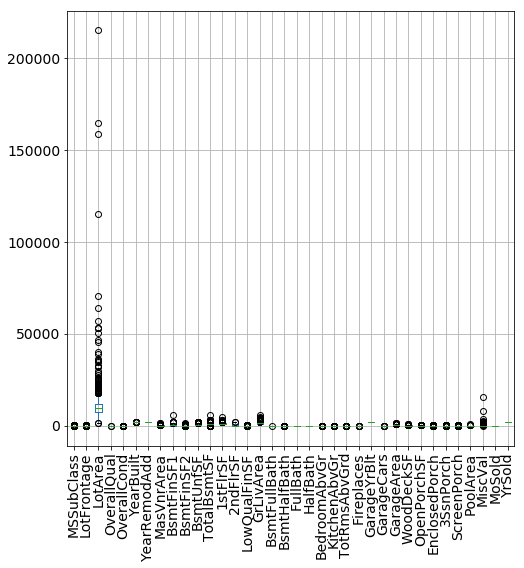

In [5]:
X.boxplot(rot=90)
plt.savefig("../../images/scale-boxplot.png")

In [6]:
y = df['SalePrice']
y.shape

(1460,)

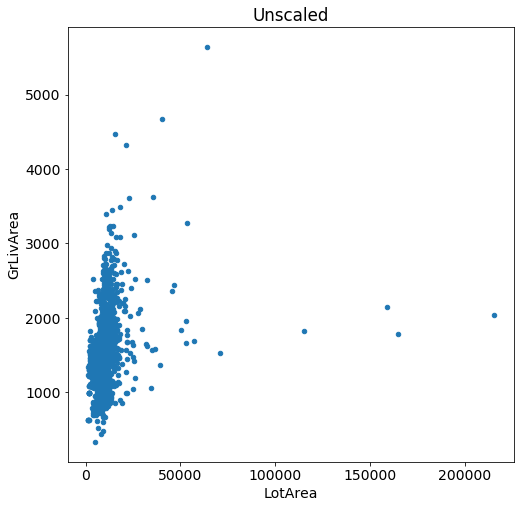

In [7]:
X.plot.scatter('LotArea', 'GrLivArea')
plt.title("Unscaled")
plt.savefig("../../images/scale-total-grliv-unscaled.png")

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


# Only use LotArea and GrLivArea as features
X = df[['LotArea', 'GrLivArea']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
lr = LinearRegression().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
lr.score(X_test_scaled, y_test)

0.55892778270202

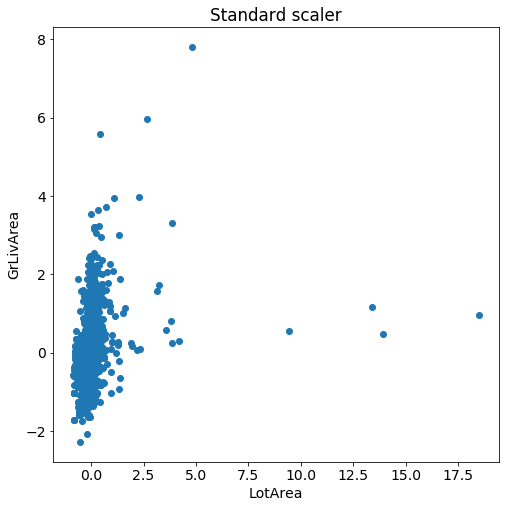

In [9]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.xlabel('LotArea')
plt.ylabel('GrLivArea')
plt.title("Standard scaler")
plt.savefig("../../images/scale-total-grliv-stdscaled.png")

0.5589277827020199

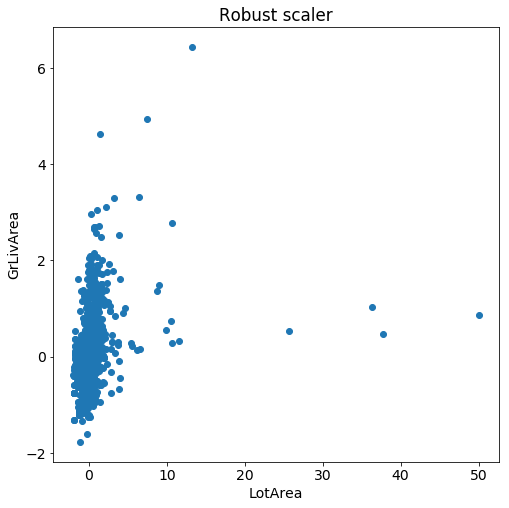

In [10]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.xlabel('LotArea')
plt.ylabel('GrLivArea')
plt.title("Robust scaler")
plt.savefig("../../images/scale-total-grliv-robustscaled.png")

lr = LinearRegression().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
lr.score(X_test_scaled, y_test)

0.55892778270202

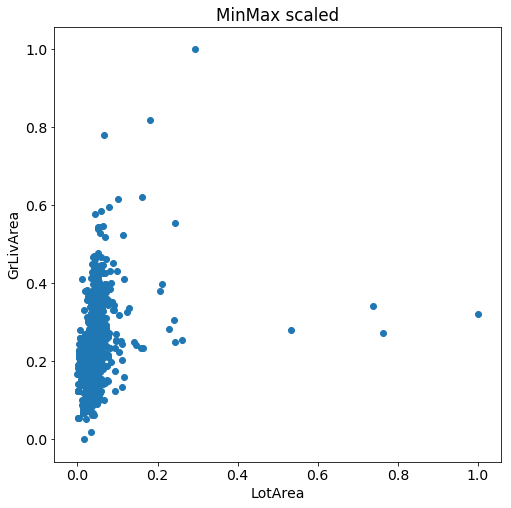

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.xlabel('LotArea')
plt.ylabel('GrLivArea')
plt.title("MinMax scaled")
plt.savefig("../../images/scale-total-grliv-minmaxscaled.png")

lr = LinearRegression().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
lr.score(X_test_scaled, y_test)

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.45673823715194056, 0.0703080659813554)

In [13]:
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.4081087548750446, 0.1688058465572699)

In [14]:
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.4472293745391103, 0.20693738814274001)

In [15]:
scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.4472293745391103, 0.20693738814274018)

In [16]:
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5640981597114161

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
knn = KNeighborsRegressor().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
knn.score(X_test_scaled, y_test)

0.5640981597114161

In [18]:
scores = cross_val_score(pipe,
                         X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.4083506249026893, 0.1580054216500705)

In [19]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 50, 2)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 31}
0.5665012180101212
